In [1]:
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np
from numpy import array
import scipy
from scipy.optimize import minimize
import networkx as nx
import itertools
from numpy import savetxt
from numba import jit, cuda
import seaborn

np.random.seed(42)

In [2]:
nr_qubits=4

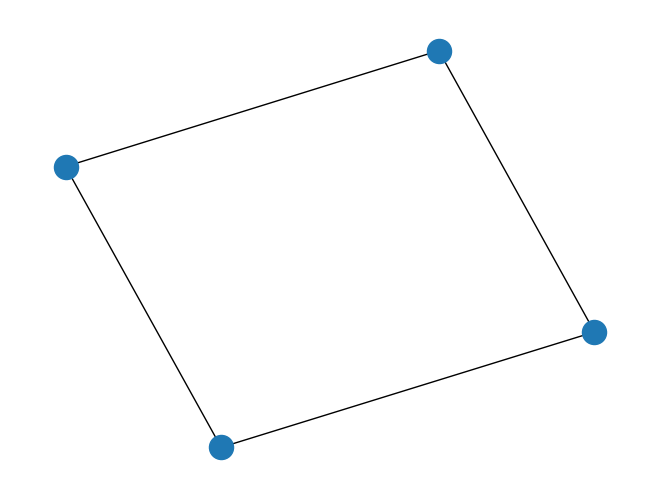

In [3]:
# Interaction Picture

interaction_graph = nx.cycle_graph(nr_qubits)
nx.draw(interaction_graph)

In [4]:
# Hamiltonian
def create_hamiltonian_matrix(n, h, graph):
    matrix = np.zeros((2 ** n, 2 ** n))
    for i in graph.edges:
        x = y = 1
        for j in range(0, n):
            if j == i[0]:
                x = np.kron(x, qml.matrix(qml.PauliX)(0))
                y = np.kron(y, qml.matrix(qml.PauliY)(0))
                
            elif j == i[1]:
                x = np.kron(x, qml.matrix(qml.PauliX)(0))
                y = np.kron(y, qml.matrix(qml.PauliY)(0))
                
            else:
                x = np.kron(x, np.identity(2))
                y = np.kron(y, np.identity(2))
            
        matrix = np.add(matrix, np.add(x, y))

    for i in range(0, n):
        z = 1
        for j in range(0, n):
            if j == i:
                z = np.kron(z, qml.matrix(qml.PauliZ)(0))           
                
            else:
                z = np.kron(z, np.identity(2))
                
        matrix = np.add(matrix, h*z) 
        
    return matrix

In [5]:
# Matrix Representation of the Thermal State
def create_target(qubit, beta, ham, b, graph):

    # Calculates the matrix form of the density matrix by taking the exponential of the Hamiltonian

    h = ham(qubit, b, graph)
    y = -1 * float(beta) * h
    new_matrix = scipy.linalg.expm(np.array(y))
    norm = np.trace(new_matrix)
    final_target = (1 / norm) * new_matrix

    return final_target

In [7]:
# XY_matrix
XY_matrix = 0
x = y = 1
for i in range(0, nr_qubits):
    if i == 0:
        x = np.kron(x, qml.matrix(qml.PauliX)(0))
        y = np.kron(y, qml.matrix(qml.PauliY)(0))
                
    elif i == 1:
        x = np.kron(x, qml.matrix(qml.PauliX)(0))
        y = np.kron(y, qml.matrix(qml.PauliY)(0))
                
    else:
        x = np.kron(x, np.identity(2))
        y = np.kron(y, np.identity(2))
            
XY_matrix = np.add(XY_matrix, np.add(x, y))

In [8]:
h=0
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list0 = []
magnetization_list0=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list0.append(exactenergy)
    magnetization_list0.append(magnetization)

In [40]:
h=-0.1
beta_list = [1/t for t in np.linspace(0.01,100,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list_1_ = []
magnetization_list_1_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list_1_.append(exactenergy)
    magnetization_list_1_.append(magnetization)

In [39]:
h=-0.2
beta_list = [1/t for t in np.linspace(0.01,100,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list_2_ = []
magnetization_list_2_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list_2_.append(exactenergy)
    magnetization_list_2_.append(magnetization)

In [27]:
h=-0.5
beta_list = [1/t for t in np.linspace(0.01,100,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list_5_ = []
magnetization_list_5_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list_5_.append(exactenergy)
    magnetization_list_5_.append(magnetization)

In [16]:
h=-1
beta_list = [1/t for t in np.linspace(0.01,100,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list1_ = []
magnetization_list1_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list1_.append(exactenergy)
    magnetization_list1_.append(magnetization)

In [26]:
h=-1.9
beta_list = [1/t for t in np.linspace(0.01,100,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list1_9_ = []
magnetization_list1_9_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list1_9_.append(exactenergy)
    magnetization_list1_9_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in multiply
  final_target = (1 / norm) * new_matrix


In [9]:
h=-2
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list2_ = []
magnetization_list2_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list2_.append(exactenergy)
    magnetization_list2_.append(magnetization)

C:\Users\user\anaconda3\lib\site-packages\scipy\linalg\_matfuncs.py:375: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in multiply
  final_target = (1 / norm) * new_matrix


In [15]:
h=-4
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list4_ = []
magnetization_list4_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list4_.append(exactenergy)
    magnetization_list4_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [17]:
h=-6
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list6_ = []
magnetization_list6_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list6_.append(exactenergy)
    magnetization_list6_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [18]:
h=-8
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list8_ = []
magnetization_list8_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list8_.append(exactenergy)
    magnetization_list8_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [19]:
h=-10
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list10_ = []
magnetization_list10_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list10_.append(exactenergy)
    magnetization_list10_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [20]:
h=-12
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list12_ = []
magnetization_list12_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list12_.append(exactenergy)
    magnetization_list12_.append(magnetization)

C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [10]:
h=-15
beta_list = [1/t for t in np.linspace(0.01,10,100)]
beta_list.sort()
T = [1/beta for beta in beta_list]
exactenergy_list15_ = []
magnetization_list15_=[]
for beta in beta_list:
    target_density_matrix = create_target(nr_qubits, beta, create_hamiltonian_matrix, h, interaction_graph)
    hamiltonian = create_hamiltonian_matrix(nr_qubits, h, interaction_graph)
    exactenergy = np.trace(np.matmul(hamiltonian, target_density_matrix))
    magnetization = np.trace(np.matmul(XY_matrix, target_density_matrix))
    exactenergy_list15_.append(exactenergy)
    magnetization_list15_.append(magnetization)

C:\Users\user\anaconda3\lib\site-packages\scipy\linalg\_matfuncs.py:375: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw
C:\Users\user\AppData\Local\Temp\ipykernel_22956\1106209622.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars
  final_target = (1 / norm) * new_matrix


In [41]:
NCE15_=[]
NCM15_=[]
for i in exactenergy_list15_ :
    NCE15_.append(i.real)
for i in magnetization_list15_ :
    NCM15_.append(i.real)

NCE12_=[]
NCM12_=[]
for i in exactenergy_list12_ :
    NCE12_.append(i.real)
for i in magnetization_list12_ :
    NCM12_.append(i.real)
    
NCE10_=[]
NCM10_=[]
for i in exactenergy_list10_ :
    NCE10_.append(i.real)
for i in magnetization_list10_ :
    NCM10_.append(i.real)

NCE8_=[]
NCM8_=[]
for i in exactenergy_list8_ :
    NCE8_.append(i.real)
for i in magnetization_list8_ :
    NCM8_.append(i.real)

NCE6_=[]
NCM6_=[]
for i in exactenergy_list6_ :
    NCE6_.append(i.real)
for i in magnetization_list6_ :
    NCM6_.append(i.real)

NCE4_=[]
NCM4_=[]
for i in exactenergy_list4_ :
    NCE4_.append(i.real)
for i in magnetization_list4_ :
    NCM4_.append(i.real)
    
NCE2_=[]
NCM2_=[]
for i in exactenergy_list2_ :
    NCE2_.append(i.real)
for i in magnetization_list2_ :
    NCM2_.append(i.real)

NCE1_9_=[]
NCM1_9_=[]
for i in exactenergy_list1_9_ :
    NCE1_9_.append(i.real)
for i in magnetization_list1_9_ :
    NCM1_9_.append(i.real)
    
NCE1_=[]
NCM1_=[]
for i in exactenergy_list1_ :
    NCE1_.append(i.real)
for i in magnetization_list1_ :
    NCM1_.append(i.real)
    
NCE_5_=[]
NCM_5_=[]
for i in exactenergy_list_5_ :
    NCE_5_.append(i.real)
for i in magnetization_list_5_ :
    NCM_5_.append(i.real)
    
NCE_2_=[]
NCM_2_=[]
for i in exactenergy_list_2_ :
    NCE_2_.append(i.real)
for i in magnetization_list_2_ :
    NCM_2_.append(i.real)
    
NCE_1_=[]
NCM_1_=[]
for i in exactenergy_list_1_ :
    NCE_1_.append(i.real)
for i in magnetization_list_1_ :
    NCM_1_.append(i.real)
    
NCE0=[]
NCM0=[]
for i in exactenergy_list0 :
    NCE0.append(i.real)
for i in magnetization_list0 :
    NCM0.append(i.real)


#### XY Parameter Curve

Text(0, 0.5, 'XY [a.u.]')

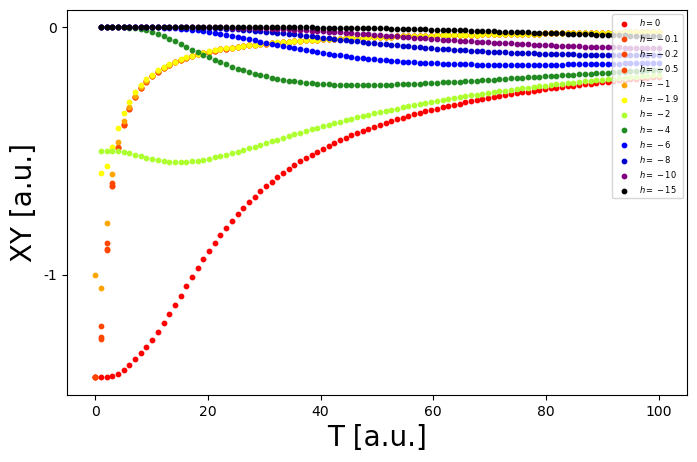

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

ax.scatter(T, NCM0, s=10, c='red', label=r'$h=0$')

ax.scatter(T, NCM_1_, s=10, c='orangered', label=r'$h=-0.1$')

ax.scatter(T, NCM_2_, s=10, c='orangered', label=r'$h=-0.2$')

ax.scatter(T, NCM_5_, s=10, c='orangered', label=r'$h=-0.5$')

ax.scatter(T, NCM1_, s=10, c='orange', label=r'$h=-1$')

ax.scatter(T, NCM1_9_, s=10, c='yellow', label=r'$h=-1.9$')

ax.scatter(T, NCM2_, s=10, c='greenyellow', label=r'$h=-2$')

ax.scatter(T, NCM4_, s=10, c='forestgreen', label=r'$h=-4$')

ax.scatter(T, NCM6_, s=10, c='blue', label=r'$h=-6$')

ax.scatter(T, NCM8_, s=10, c='mediumblue', label=r'$h=-8$')

ax.scatter(T, NCM10_, s=10, c='purple', label=r'$h=-10$')

ax.scatter(T, NCM15_, s=10, c='black', label=r'$h=-15$')

ax.legend(loc='upper right', fontsize=6)

ax.set_xlabel('T [a.u.]',fontsize=20)
ax.set_ylabel('XY [a.u.]',fontsize=20)

#### Order Parameter

(-1.0, 16.0)

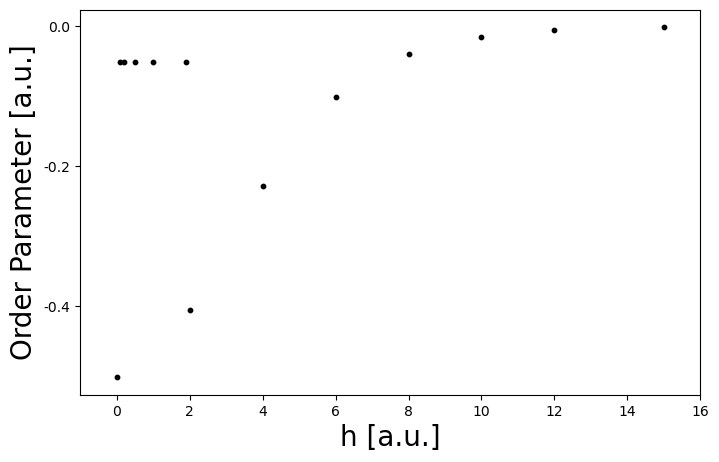

In [44]:
# T~40
OP3=[]
OP3.append(NCM0[60])
OP3.append(NCM1_[60])
OP3.append(NCM2_[60])
OP3.append(NCM4_[60])
OP3.append(NCM6_[60])
OP3.append(NCM8_[60])
OP3.append(NCM10_[60])
OP3.append(NCM15_[60])
OP3.append(NCM12_[60])
OP3.append(NCM1_9_[60])
OP3.append(NCM_5_[60])
OP3.append(NCM_2_[60])
OP3.append(NCM_1_[60])

EF3=[]
EF3.append(0)
EF3.append(1)
EF3.append(2)
EF3.append(4)
EF3.append(6)
EF3.append(8)
EF3.append(10)
EF3.append(15)
EF3.append(12)
EF3.append(1.9)
EF3.append(0.5)
EF3.append(0.2)
EF3.append(0.1)

fig, ax = plt.subplots(figsize=(8, 5))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.scatter(EF3, OP3, s=10, c='black', label=r'Order Parameter')

ax.set_xlabel('h [a.u.]',fontsize=20)
ax.set_ylabel('Order Parameter [a.u.]',fontsize=20)
ax.set_xlim(-1, 16)

(-1.0, 16.0)

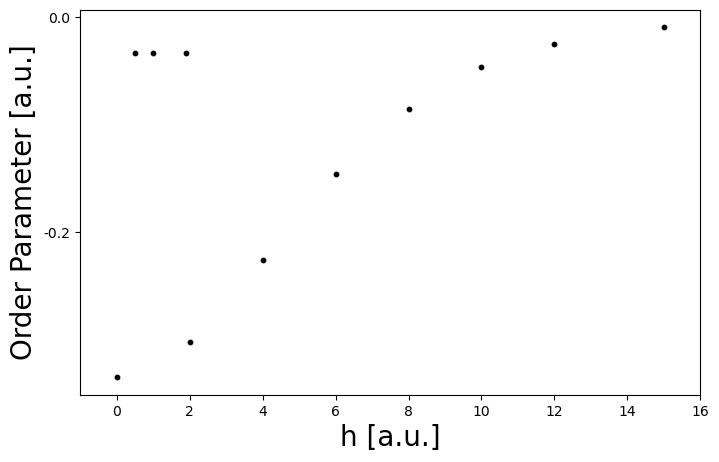

In [49]:
# T~60
OP=[]
OP.append(NCM0[40])
OP.append(NCM1_[40])
OP.append(NCM2_[40])
OP.append(NCM4_[40])
OP.append(NCM6_[40])
OP.append(NCM8_[40])
OP.append(NCM10_[40])
OP.append(NCM15_[40])
OP.append(NCM12_[40])
OP.append(NCM1_9_[40])
OP.append(NCM_5_[40])

EF=[]
EF.append(0)
EF.append(1)
EF.append(2)
EF.append(4)
EF.append(6)
EF.append(8)
EF.append(10)
EF.append(15)
EF.append(12)
EF.append(1.9)
EF.append(0.5)

fig, ax = plt.subplots(figsize=(8, 5))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.scatter(EF, OP, s=10, c='black', label=r'Order Parameter')

ax.set_xlabel('h [a.u.]',fontsize=20)
ax.set_ylabel('Order Parameter [a.u.]',fontsize=20)
ax.set_xlim(-1, 16)

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches((10, 15)); plt.subplots_adjust(hspace=0)

ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# ploting for T~40
ax[0].set_xlim(-1, 16)
ax[0].set_ylabel(r'$XY$ [a.u.]',fontsize=20)
ax[0].axvline(2.0, 0, 1, color='red', linestyle='--', linewidth=2)
ax[0].scatter(EF3, OP3, s=25, c='k')
ax[0].text(-3, 0, '(a)', fontsize=20)

# ploting for T~60
ax[1].set_xlim(-1, 16)
ax[1].set_ylabel(r'$XY$ [a.u.]',fontsize=20)
ax[1].axvline(2.0, 0, 1, color='red', linestyle='--', linewidth=2)
ax[1].scatter(EF, OP, s=25, c='k')
ax[1].text(-3, -0.01, '(b)', fontsize=20)
ax[1].set_xlabel(r'$h$ [a.u.]',fontsize=20)

# save figure
fig.savefig('Order Parameter Graph (XY).png',bbox_inches='tight', dpi=600)
plt.close()

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))


xv=np.linspace(0, 10, 512)
v=xv**2/50+1.8
v_=-v

ax.set_xlim(0, 10)
ax.set_ylim(-5, 5)
plt.axhline(2.0, 0, 1, color='lightgrey', linestyle='-', linewidth=2, label=r'$|h|=2$ Transition Line')
plt.axhline(-2.0, 0, 1, color='lightgrey', linestyle='-', linewidth=2)
plt.fill([0, 10, 10, 0], [2, 2, 5, 5], color='lightgray', alpha=0.5)
plt.fill([0, 10, 10, 0], [-2, -2, -5, -5], color='lightgray', alpha=0.5)
ax.plot(xv, v, color='black', linestyle='--', label='BKT Transition Line')
ax.plot(xv, -v, color='black', linestyle='--')
ax.text(4.3, 3.5, 'Phase 1', fontsize=20)
ax.text(4.3, -3.5, 'Phase 1', fontsize=20)
ax.text(4.3, 0, 'Phase 2', fontsize=20)
ax.legend(loc='upper left', fontsize=15)

ax.set_xlabel(r'$T$ [a.u.]',fontsize=20)
ax.set_ylabel(r'$h$ [a.u.]',fontsize=20)

# save figure
fig.savefig('Phase Diagram.png',bbox_inches='tight', dpi=600)
plt.close()